# <a name="0">Pneumonia X-Ray Images</a>
## A Computer Vision Problem.
### The competition page from [this](https://www.kaggle.com/datasets/pcbreviglieri/pneumonia-xray-images) link.

### Table of Contents of the notebook:

1. <a href="#1">**Libraries**</a>
2. <a href="#2">**Display some Imgs**</a>
3. <a href="#3">**BaseLine Model**</a>
4. <a href="#4">**Data Augmentation Model**</a>
5. <a href='#5'>**Frozen Model**</a>
6. <a href='#6'>**Fine Tuning Model**</a>


# 1. <a name="1">**Libraries**</a>

In [2]:
!pip install --upgrade  tensorflow==2.8.0

## Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from getpass import getpass
import os

import tensorflow.keras as keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

from tensorflow.keras.models import load_model

In [4]:
keras.__version__

'2.8.0'

# 2. <a name="2">**Display some Imgs**</a>

(1858, 2090, 3)


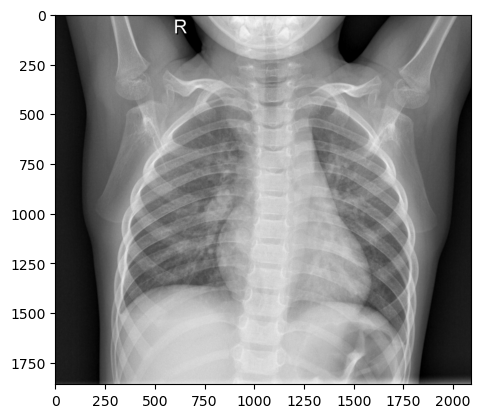

(1434, 1810, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

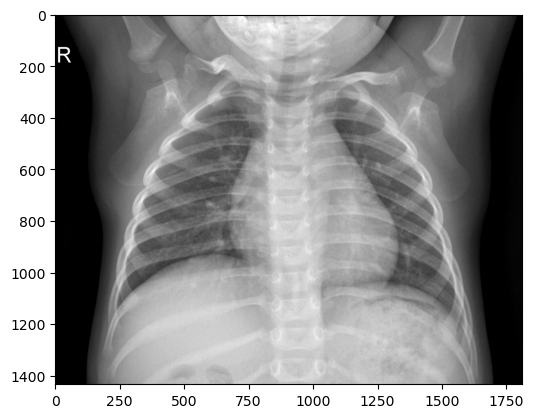

In [5]:
import cv2
# from google.colab.patches import cv2_imshow

norm_img = cv2.imread("/kaggle/input/pneumonia-xray-images/train/normal/IM-0115-0001.jpeg")
print(norm_img.shape)
plt.imshow(norm_img)
plt.show()

norm_img = cv2.imread("/kaggle/input/pneumonia-xray-images/train/normal/IM-0119-0001.jpeg")
print(norm_img.shape)
plt.imshow(norm_img)
plt.show

(760, 1152, 3)


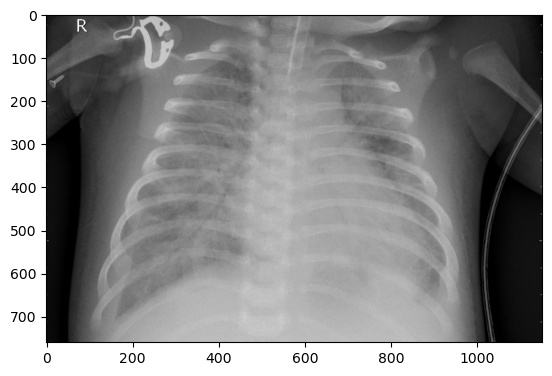

(940, 1242, 3)


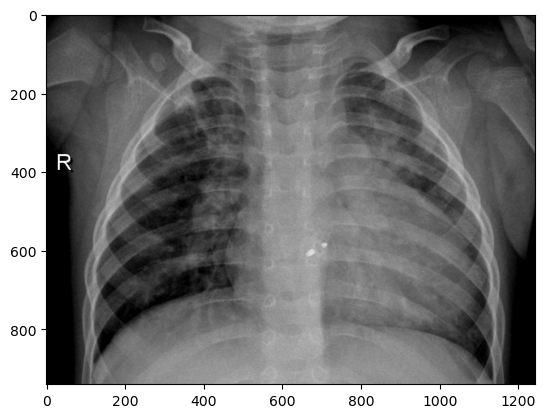

In [6]:
op_img = cv2.imread("/kaggle/input/pneumonia-xray-images/train/opacity/person1000_bacteria_2931.jpeg")
print(op_img.shape)
plt.imshow(op_img)
plt.show()

op_img = cv2.imread("/kaggle/input/pneumonia-xray-images/train/opacity/person1002_bacteria_2933.jpeg")
print(op_img.shape)
plt.imshow(op_img)
plt.show()

# 3. <a name="3">**BaseLine Model**</a>

## Preprocessing

In [58]:
train_datagen = ImageDataGenerator(rescale= 1./255)
val_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/train',
                                                    target_size=(256, 256),
                                                    batch_size=20,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/val',
                                                target_size=(256, 256),
                                                batch_size = 20,
                                                class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/test',
                                                target_size=(256, 256),
                                                batch_size = 20,
                                                class_mode = 'binary')

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [59]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    for img in data_batch:
        print(img.shape)
    break

data batch shape: (20, 256, 256, 3)
labels batch shape: (20,)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


## Build Neural Network

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 128)     

In [62]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

In [63]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=val_generator,
                    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 42s 410ms/step - loss: 0.5863 - acc: 0.7335 - val_loss: 0.5564 - val_acc: 0.7380
Epoch 2/30
100/100 [==============================] - 40s 404ms/step - loss: 0.5152 - acc: 0.7395 - val_loss: 0.4427 - val_acc: 0.7790
Epoch 3/30
100/100 [==============================] - 40s 399ms/step - loss: 0.3749 - acc: 0.8434 - val_loss: 0.3183 - val_acc: 0.8570
Epoch 4/30
100/100 [==============================] - 40s 403ms/step - loss: 0.2634 - acc: 0.9105 - val_loss: 0.2281 - val_acc: 0.9320
Epoch 5/30
100/100 [==============================] - 40s 397ms/step - loss: 0.1978 - acc: 0.9247 - val_loss: 0.1998 - val_acc: 0.9320
Epoch 6/30
100/100 [==============================] - 40s 400ms/step - loss: 0.1665 - acc: 0.9440 - val_loss: 0.1740 - val_acc: 0.9380
Epoch 7/30
100/100 [==============================] - 40s 398ms/step - loss: 0.1401 - acc: 0.9550 - val_loss: 0.1607 - val_acc: 0.9460
Epoch 8/30
100/100 [==============================] - 4

In [64]:
train_acc, train_loss = model.evaluate(train_generator)

210/210 [==============================] - 54s 255ms/step - loss: 0.0573 - acc: 0.9792


In [65]:
val_acc, val_loss = model.evaluate(val_generator)

52/52 [==============================] - 14s 270ms/step - loss: 0.0944 - acc: 0.9625


In [66]:
test_acc, test_loss = model.evaluate(test_generator)

32/32 [==============================] - 8s 236ms/step - loss: 0.8608 - acc: 0.7596


In [67]:
model.save('/kaggle/working/X_Ray.h5')

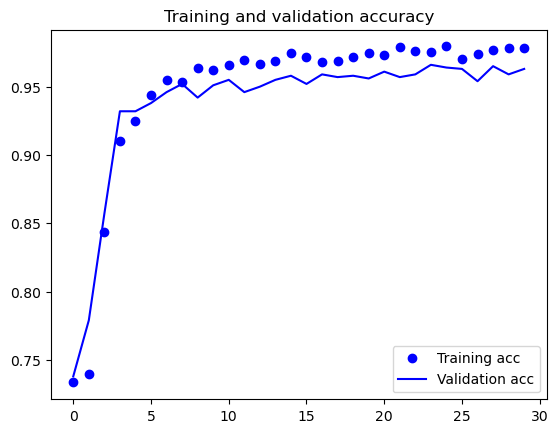

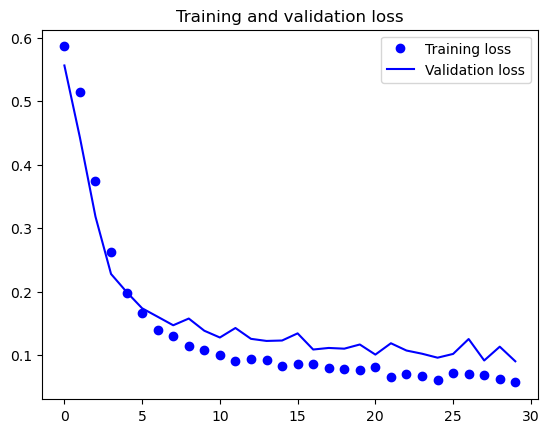

In [68]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 4. <a name="4">**Data Augmentation Model**</a>

In [69]:
train_datagen = ImageDataGenerator(rescale= 1./255, 
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/val',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/test',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Display Aug Images

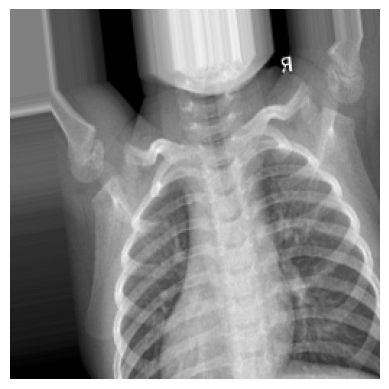

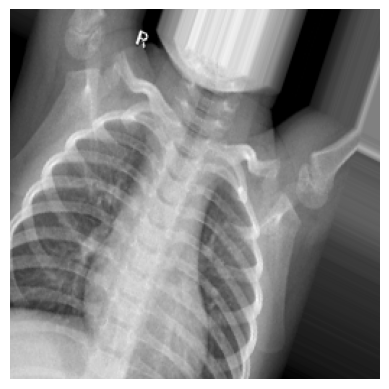

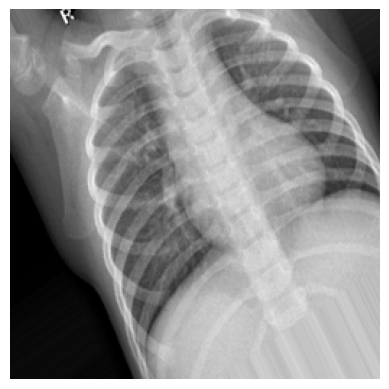

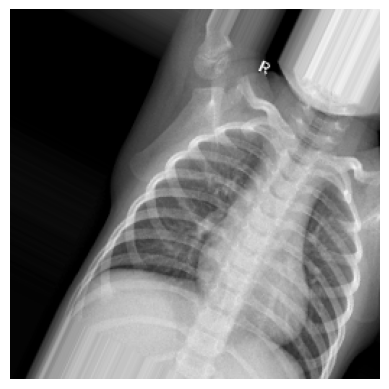

In [70]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

fnames = [os.path.join('/kaggle/input/pneumonia-xray-images/train/normal', fname) for fname in os.listdir('/kaggle/input/pneumonia-xray-images/train/normal')]

# We pick one image
img_path = fnames[35]

# Read the image and resize it
img = image.load_img(img_path, target_size=(256, 256))

# Convert it to a Numpy array with shape (256, 256, 3)
x = image.img_to_array(img)

# Reshape it to (1, 256, 256, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches 
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    #conv_fm = model.predict(batch[0])
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    #save(X, y)
    i += 1
    if i % 4 == 0:#if i < 20000 == 0:
        break

plt.show()

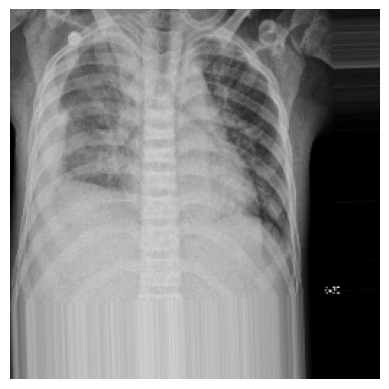

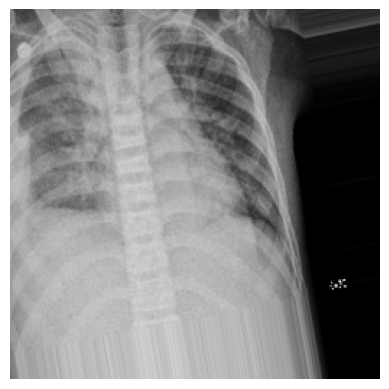

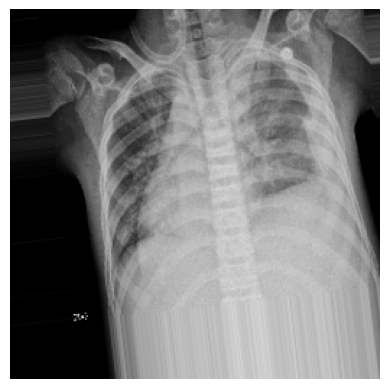

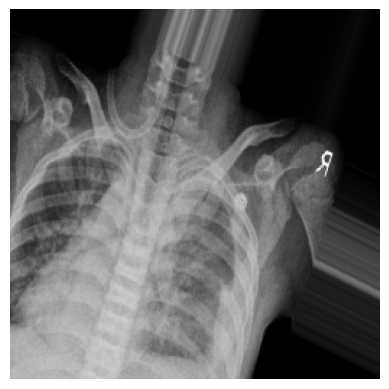

In [71]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

fnames = [os.path.join('/kaggle/input/pneumonia-xray-images/train/opacity', fname) for fname in os.listdir('/kaggle/input/pneumonia-xray-images/train/opacity')]

# We pick one image
img_path = fnames[86]

# Read the image and resize it
img = image.load_img(img_path, target_size=(256, 256))

# Convert it to a Numpy array with shape (256, 256, 3)
x = image.img_to_array(img)

# Reshape it to (1, 256, 256, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches 
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    #conv_fm = model.predict(batch[0])
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    #save(X, y)
    i += 1
    if i % 4 == 0:#if i < 20000 == 0:
        break

plt.show()

### Build Model

In [72]:
model_aug = models.Sequential()
model_aug.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_aug.add(layers.MaxPooling2D((2, 2)))
model_aug.add(layers.Flatten())
model_aug.add(layers.Dense(512, activation='relu'))
model_aug.add(layers.Dropout(0.5))
model_aug.add(layers.Dense(1, activation='sigmoid'))

model_aug.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics=['acc'])

In [73]:
model_aug.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 128)     

In [74]:
history_AUG = model_aug.fit(train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    epochs=30,
                    validation_data=val_generator,
                    validation_steps=val_generator.n//val_generator.batch_size)

Epoch 1/30
131/131 [==============================] - 121s 923ms/step - loss: 0.5826 - acc: 0.7381 - val_loss: 0.5771 - val_acc: 0.7432
Epoch 2/30
131/131 [==============================] - 120s 915ms/step - loss: 0.5247 - acc: 0.7428 - val_loss: 0.5185 - val_acc: 0.7422
Epoch 3/30
131/131 [==============================] - 120s 917ms/step - loss: 0.3917 - acc: 0.8115 - val_loss: 0.4003 - val_acc: 0.8262
Epoch 4/30
131/131 [==============================] - 122s 933ms/step - loss: 0.3404 - acc: 0.8409 - val_loss: 0.3570 - val_acc: 0.8506
Epoch 5/30
131/131 [==============================] - 122s 929ms/step - loss: 0.3188 - acc: 0.8507 - val_loss: 0.3312 - val_acc: 0.8662
Epoch 6/30
131/131 [==============================] - 121s 925ms/step - loss: 0.3094 - acc: 0.8516 - val_loss: 0.3139 - val_acc: 0.8740
Epoch 7/30
131/131 [==============================] - 122s 929ms/step - loss: 0.3028 - acc: 0.8578 - val_loss: 0.3613 - val_acc: 0.8486
Epoch 8/30
131/131 [============================

In [75]:
train_acc, train_loss = model_aug.evaluate(train_generator)

131/131 [==============================] - 105s 800ms/step - loss: 0.2086 - acc: 0.9122


In [76]:
val_acc, val_loss = model_aug.evaluate(val_generator)

33/33 [==============================] - 14s 431ms/step - loss: 0.4022 - acc: 0.8058


In [77]:
test_acc, test_loss = model_aug.evaluate(test_generator)

20/20 [==============================] - 8s 386ms/step - loss: 0.3082 - acc: 0.8590


In [78]:
model_aug.save('/kaggle/working/X_Ray_Aug.h5')

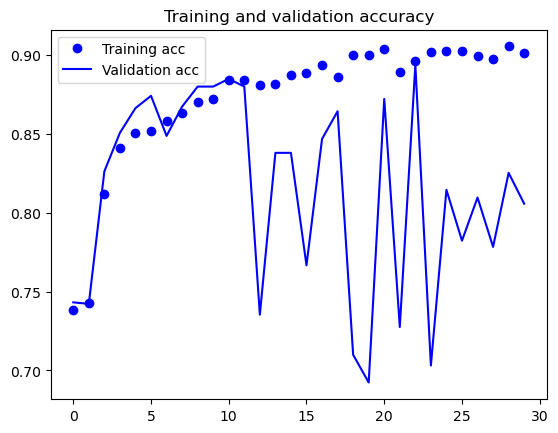

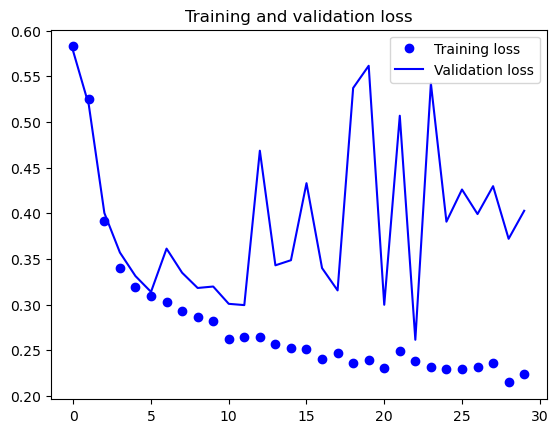

In [79]:
import matplotlib.pyplot as plt

acc = history_AUG.history['acc']
val_acc = history_AUG.history['val_acc']
loss = history_AUG.history['loss']
val_loss = history_AUG.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 5. <a name="5">**Frozen Model**</a>



In [8]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (256, 256, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

### Preprocessing

In [10]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/val',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/kaggle/input/pneumonia-xray-images/test',
                                                target_size=(256, 256),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Build model

In [11]:
model_TL = models.Sequential()
model_TL.add(conv_base)
model_TL.add(layers.Flatten())
model_TL.add(layers.Dropout(0.25))
model_TL.add(layers.Dense(256, activation='relu'))
model_TL.add(layers.Dropout(0.25))
# model_TL.add(layers.Dense(64, activation='relu'))
model_TL.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model_TL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 23,103,809
No

In [13]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model_TL.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [14]:
conv_base.trainable = False

In [15]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model_TL.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [16]:
model_TL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 8,389,121
Non

In [17]:
model_TL.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                loss='binary_crossentropy',
                metrics=['acc'])

In [18]:
history_FM = model_TL.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=10,
      validation_data=val_generator,
      validation_steps=val_generator.n//val_generator.batch_size,
      verbose=1)

Epoch 1/10
131/131 [==============================] - 179s 1s/step - loss: 1.4888 - acc: 0.7860 - val_loss: 0.5712 - val_acc: 0.8818
Epoch 2/10
131/131 [==============================] - 124s 949ms/step - loss: 0.7509 - acc: 0.8731 - val_loss: 0.3516 - val_acc: 0.9219
Epoch 3/10
131/131 [==============================] - 124s 945ms/step - loss: 0.5857 - acc: 0.8948 - val_loss: 0.3084 - val_acc: 0.9258
Epoch 4/10
131/131 [==============================] - 123s 939ms/step - loss: 0.5076 - acc: 0.9008 - val_loss: 0.2652 - val_acc: 0.9316
Epoch 5/10
131/131 [==============================] - 124s 948ms/step - loss: 0.4646 - acc: 0.9132 - val_loss: 0.2264 - val_acc: 0.9336
Epoch 6/10
131/131 [==============================] - 127s 967ms/step - loss: 0.3674 - acc: 0.9208 - val_loss: 0.1773 - val_acc: 0.9561
Epoch 7/10
131/131 [==============================] - 124s 951ms/step - loss: 0.3210 - acc: 0.9234 - val_loss: 0.2303 - val_acc: 0.9365
Epoch 8/10
131/131 [==============================]

In [19]:
train_acc, train_loss = model_TL.evaluate(train_generator)

131/131 [==============================] - 109s 835ms/step - loss: 0.1479 - acc: 0.9513


In [20]:
val_acc, val_loss = model_TL.evaluate(val_generator)

33/33 [==============================] - 16s 482ms/step - loss: 0.1940 - acc: 0.9404


In [21]:
test_acc, test_loss = model_TL.evaluate(test_generator)

20/20 [==============================] - 13s 660ms/step - loss: 0.3038 - acc: 0.8910


In [22]:
model_TL.save('/kaggle/working//X_Ray_TL.h5')

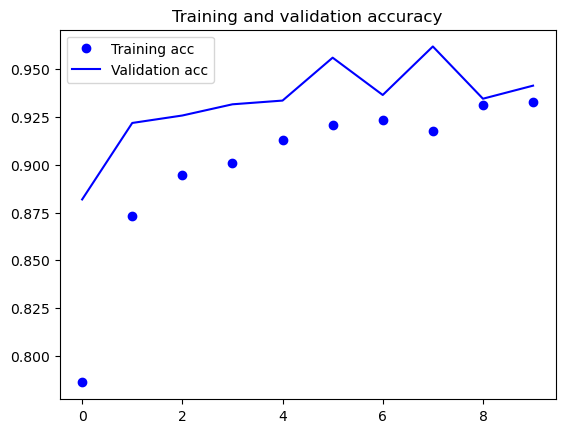

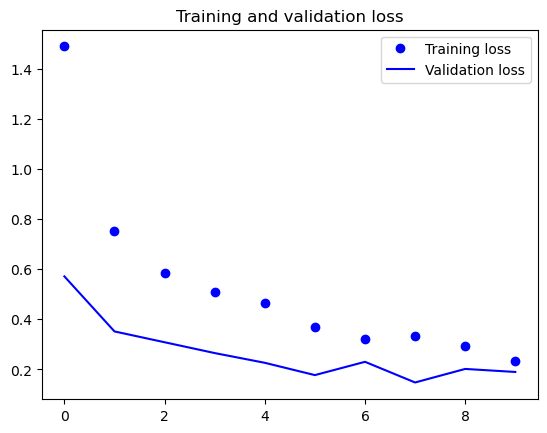

In [23]:
import matplotlib.pyplot as plt

acc = history_FM.history['acc']
val_acc = history_FM.history['val_acc']
loss = history_FM.history['loss']
val_loss = history_FM.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 6. <a name="6">**Fine Tuning Model**</a>

In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [25]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if (layer.name == 'block5_conv1'):
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

## Build Model

In [27]:
model_copy= keras.models.clone_model(model_TL)
model_copy.build((None, 256, 256, 3))                                 # replace 10 with number of variables in input layer
model_copy.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                   loss='binary_crossentropy',
                   metrics=['acc'])
model_copy.set_weights(model_TL.get_weights())

model_copy.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 15,468,545
No

In [28]:
model_copy.compile(optimizer = optimizers.Adam(learning_rate = 1e-5),
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [29]:
history_FT = model_copy.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,
      epochs=10,
      validation_data=val_generator,
      validation_steps=val_generator.n//val_generator.batch_size,
      verbose=1)

Epoch 1/10
131/131 [==============================] - 129s 972ms/step - loss: 0.2578 - acc: 0.9303 - val_loss: 0.1990 - val_acc: 0.9336
Epoch 2/10
131/131 [==============================] - 128s 976ms/step - loss: 0.1766 - acc: 0.9437 - val_loss: 0.1993 - val_acc: 0.9365
Epoch 3/10
131/131 [==============================] - 126s 966ms/step - loss: 0.1613 - acc: 0.9451 - val_loss: 0.1236 - val_acc: 0.9580
Epoch 4/10
131/131 [==============================] - 126s 961ms/step - loss: 0.1406 - acc: 0.9499 - val_loss: 0.1421 - val_acc: 0.9551
Epoch 5/10
131/131 [==============================] - 125s 958ms/step - loss: 0.1361 - acc: 0.9547 - val_loss: 0.1592 - val_acc: 0.9443
Epoch 6/10
131/131 [==============================] - 125s 956ms/step - loss: 0.1097 - acc: 0.9587 - val_loss: 0.1545 - val_acc: 0.9531
Epoch 7/10
131/131 [==============================] - 125s 953ms/step - loss: 0.1073 - acc: 0.9625 - val_loss: 0.1087 - val_acc: 0.9639
Epoch 8/10
131/131 [============================

In [30]:
train_acc, train_loss = model_copy.evaluate(train_generator)

131/131 [==============================] - 108s 828ms/step - loss: 0.0680 - acc: 0.9754


In [31]:
val_acc, val_loss = model_copy.evaluate(val_generator)

33/33 [==============================] - 15s 461ms/step - loss: 0.1695 - acc: 0.9471


In [32]:
test_acc, test_loss = model_copy.evaluate(test_generator)

20/20 [==============================] - 8s 402ms/step - loss: 0.2264 - acc: 0.9151


In [33]:
model_TL.save('/kaggle/working/X_Ray_FT.h5')

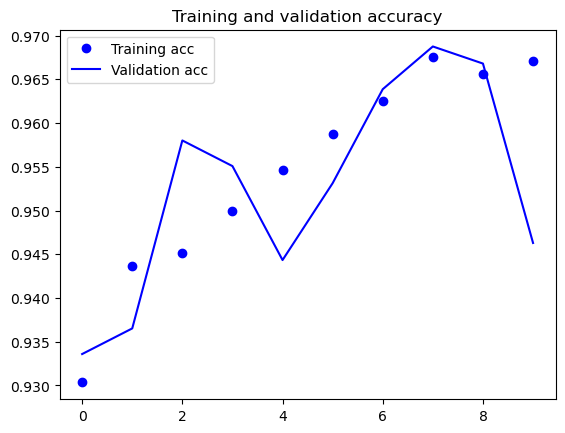

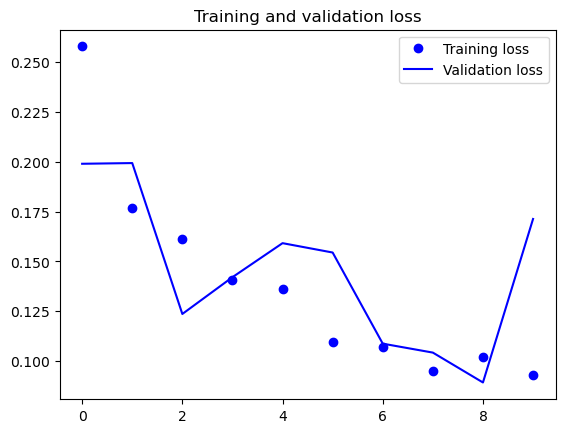

In [34]:
import matplotlib.pyplot as plt

acc = history_FT.history['acc']
val_acc = history_FT.history['val_acc']
loss = history_FT.history['loss']
val_loss = history_FT.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Smoothing

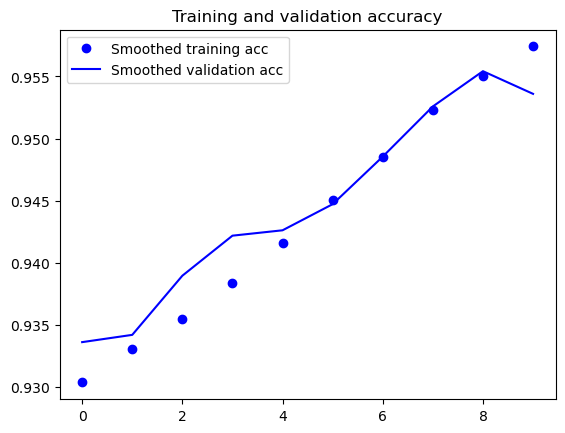

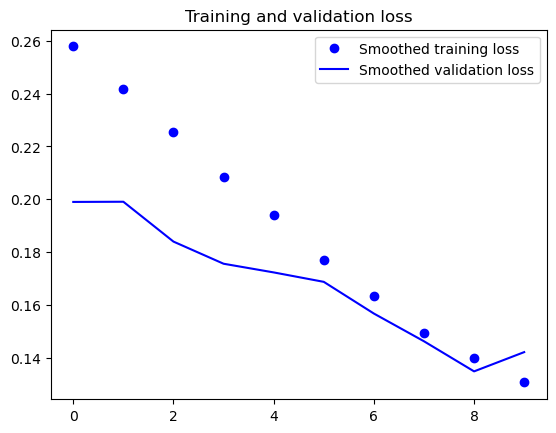

In [35]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()